# Importation des biblios
Import catch22

In [367]:

import pycatch22 as catch22
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob


# Importation des Données 

 charger_fichiers_csv

In [368]:
def Organisation_Donnees_Capteurs(Donnees):
    n = len(Donnees)
    donnees_organisees = np.zeros((n, 3))  # Crée un tableau numpy pour stocker les données organisées
    for i in range(n):
        donnees_organisees[i, 0] = Donnees[i][0]
        donnees_organisees[i, 1] = Donnees[i][1]
        donnees_organisees[i, 2] = Donnees[i][2]
    return donnees_organisees


def charger_fichiers_csv(nom_dossier):
    # Construire le chemin absolu du dossier
    chemin_absolu = os.path.abspath(nom_dossier)
    # Vérifier si le chemin est un dossier
    if not os.path.isdir(chemin_absolu):
        print(f"{nom_dossier} n'est pas un dossier valide.")
        return None
    
    # Liste pour stocker les données des fichiers CSV
    donnees_csv = {}
     
    # Parcourir les fichiers dans le dossier
    for fichier in glob.glob(os.path.join(chemin_absolu, '*.csv')):
        # Obtenir le nom du fichier sans l'extension
        nom_fichier = os.path.splitext(os.path.basename(fichier))[0]
    
        if nom_fichier == 'name':
            continue
            
        else:
        # Charger les données du fichier CSV
            try:
                donnees = np.loadtxt(fichier, delimiter=';',skiprows=1)
                donnees_csv[nom_fichier + "_header"] = Organisation_Donnees_Capteurs(donnees)
            except Exception as e:
                print(f"Erreur lors du chargement du fichier {fichier}: {str(e)}")
    return donnees_csv

In [369]:
SignauxCapteursMSD = charger_fichiers_csv('SignauxCapteursMSD/SignauxCapteursOXMSD')
SignauxCapteurMAD3Spires = charger_fichiers_csv('SignauxCapteurMAD3Spires/SignauxCapteurOXMAD3Spires')
SignauxCapteurMAD5Spires = charger_fichiers_csv('SignauxCapteurMAD5Spires/SignauxCapteurOXMAD5Spires')
SignauxCapteursMSD
#
dfs=[]
for name, valeurs in SignauxCapteursMSD.items():
        if name in SignauxCapteurMAD3Spires and name in SignauxCapteurMAD5Spires:
                DonneesSansDefaut=SignauxCapteursMSD[name]
                DonneesAvecDefaut3Spires = SignauxCapteurMAD3Spires[name]
                DonneesAvecDefaut5Spires = SignauxCapteurMAD5Spires[name]

                DonneesSansDefaut = DonneesSansDefaut[:, 1:]
                DonneesAvecDefaut3Spires = DonneesAvecDefaut3Spires[:, 1:]
                DonneesAvecDefaut5Spires = DonneesAvecDefaut5Spires[:, 1:]

                # Concaténer les données sans défaut et avec défaut
                Donnees_list = np.hstack((DonneesSansDefaut, DonneesAvecDefaut3Spires,DonneesAvecDefaut5Spires))
                Donnees_list=Donnees_list.T
                # fig, axes = plt.subplots(3,2, figsize=(15,5))
                # for index, ax in enumerate(axes.ravel()):
                #     ax.plot(Donnees_list[index], lw=1)
                #     ax.set_title(f'Time-Series {index+1}')
                #     if index == 2 or index == 3:
                #         ax.set_xlabel('Time')
                #     if index == 0 or index == 2:
                #         ax.set_ylabel('x')
                #     ax.set_xlim(0, 400)
                # fig.tight_layout()

                features = np.array([catch22.catch22_all(Donnees_list[i])['values'] for i in range(len(Donnees_list))])
                fnames22 = catch22.catch22_all(Donnees_list[0])['names']
                df = pd.DataFrame(features, columns=fnames22)
                df.insert(0, 'Name', name)
                # Ajouter le DataFrame à la liste
                dfs.append(df)

# Concaténer tous les DataFrames dans un seul
result_df = pd.concat(dfs, ignore_index=True)

# Exporter le DataFrame dans un fichier Excel
result_df.to_excel('resultat.xlsx', index=False)


In [370]:
#recuperer les signaux de la machine sans defaut
filename1 = 'SignauxCapteursMSD/SignauxCapteursOXMSD/S_OX1.csv'
DonneesSansDefaut = np.loadtxt(filename1, delimiter=';')
print(DonneesSansDefaut.shape)

# recuperer les signaux de la machine on defaut
filename2 = 'SignauxCapteurMAD5Spires/SignauxCapteurOXMAD5Spires/S_OX1.csv'
DonneesAvecDefaut = np.loadtxt(filename2, delimiter=';')
print(DonneesAvecDefaut.shape)

(801, 3)
(801, 3)


# Application du catch22 sur mes données
Apply catch22 feature extraction using the default parameters (i.e. extract all 22 features) and inspect the returned dictionary.

In [371]:


catch22_output1=catch22.catch22_all(DonneesSansDefaut[:,1])
catch22_output2=catch22.catch22_all(DonneesSansDefaut[:,2])
catch22_output3=catch22.catch22_all(DonneesSansDefaut[:,1]-DonneesSansDefaut[:,2])
fnames22 = catch22_output1['names']

catch22_output4=catch22.catch22_all(DonneesAvecDefaut[:,1])
catch22_output5=catch22.catch22_all(DonneesAvecDefaut[:,2])
catch22_output6=catch22.catch22_all(DonneesAvecDefaut[:,1]-DonneesAvecDefaut[:,2])
catch22_output4

{'names': ['DN_HistogramMode_5',
  'DN_HistogramMode_10',
  'CO_f1ecac',
  'CO_FirstMin_ac',
  'CO_HistogramAMI_even_2_5',
  'CO_trev_1_num',
  'MD_hrv_classic_pnn40',
  'SB_BinaryStats_mean_longstretch1',
  'SB_TransitionMatrix_3ac_sumdiagcov',
  'PD_PeriodicityWang_th0_01',
  'CO_Embed2_Dist_tau_d_expfit_meandiff',
  'IN_AutoMutualInfoStats_40_gaussian_fmmi',
  'FC_LocalSimple_mean1_tauresrat',
  'DN_OutlierInclude_p_001_mdrmd',
  'DN_OutlierInclude_n_001_mdrmd',
  'SP_Summaries_welch_rect_area_5_1',
  'SB_BinaryStats_diff_longstretch0',
  'SB_MotifThree_quantile_hh',
  'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
  'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
  'SP_Summaries_welch_rect_centroid',
  'FC_LocalSimple_mean3_stderr'],
 'values': [1.3211865147740083,
  -0.8205072088140087,
  27.977312097044035,
  100,
  0.9263181825990426,
  0.005752807948163125,
  0.6825,
  101.0,
  0.008073817762399078,
  199,
  0.48413348220822094,
  40.0,
  0.06521739130434782,
  -0.008739076154806513,

# Créer la DataFrame feature_matrix

In [372]:

feature_matrix = pd.DataFrame([catch22_output1['values'],catch22_output2['values'],catch22_output3['values'],catch22_output4['values'],catch22_output5['values'],catch22_output6['values']], columns=catch22_output1['names']).T
feature_matrix

,0,1,2,3,4,5
DN_HistogramMode_5,-6.986158e-07,-0.000080,-9.807074e-04,1.321187,-1.346877,-0.032783
DN_HistogramMode_10,-6.986158e-07,-0.000080,2.503138e-01,-0.820507,-1.175834,0.261315
CO_f1ecac,3.409341e+01,34.146728,2.311669e+01,27.977312,31.255313,14.468231
CO_FirstMin_ac,9.900000e+01,99.000000,1.000000e+02,100.000000,100.000000,33.000000
CO_HistogramAMI_even_2_5,1.025196e+00,1.039569,9.624049e-01,0.926318,0.824055,0.525883
CO_trev_1_num,1.896215e-03,0.001961,1.933452e-07,0.005753,0.000048,0.008733
MD_hrv_classic_pnn40,2.912500e-01,0.276250,5.050000e-01,0.682500,0.786250,0.870000
SB_BinaryStats_mean_longstretch1,1.010000e+02,101.000000,7.000000e+01,101.000000,101.000000,37.000000
SB_TransitionMatrix_3ac_sumdiagcov,1.302083e-03,0.009115,9.114583e-03,0.008074,0.009115,0.002884
PD_PeriodicityWang_th0_01,2.000000e+02,200.000000,1.430000e+02,199.000000,199.000000,54.000000


# Accessing Individual Time-Series Features
Each of the catch22 features can be accessed invidually by calling a function corresponding to the time-series feature of interest. Note that individual feature functions only accept arrays as tuples or lists (not numpy arrays). For example, to extract the DN_HistogramMode_5 feature, we call the corresponding function on our time-series list

In [373]:
Donnees_list = list(DonneesSansDefaut[:,1]) # convert our time-series example into a list data type
single_feature_output = catch22.DN_HistogramMode_5(Donnees_list) # compute a single time-series feature
print(single_feature_output)

-6.986157887745037e-07


# Extracting Features from a Dataset of time-series
Now that we have established how to apply catch22 to a single time-series, we can now apply catch22 to an entire dataset of time-series, each with the same or differing length, to produce a time-series X feature matrix. We will begin by generating a list of 10 univariate time-series, each with varying lengths of incrementally increasing size.

In [374]:
DonneesSansDefaut = DonneesSansDefaut[:, 1:]
DonneesAvecDefaut = DonneesAvecDefaut[:, 1:]

# Concaténer les données sans défaut et avec défaut
Donnees_list = np.hstack((DonneesSansDefaut, DonneesAvecDefaut))
Donnees_list=Donnees_list.T
# Vérifier la forme de Donnees_list
print("Shape de Donnees_list :", Donnees_list.shape)

for array in Donnees_list:
    print(array.shape)

Shape de Donnees_list : (4, 801)
(801,)
(801,)
(801,)
(801,)


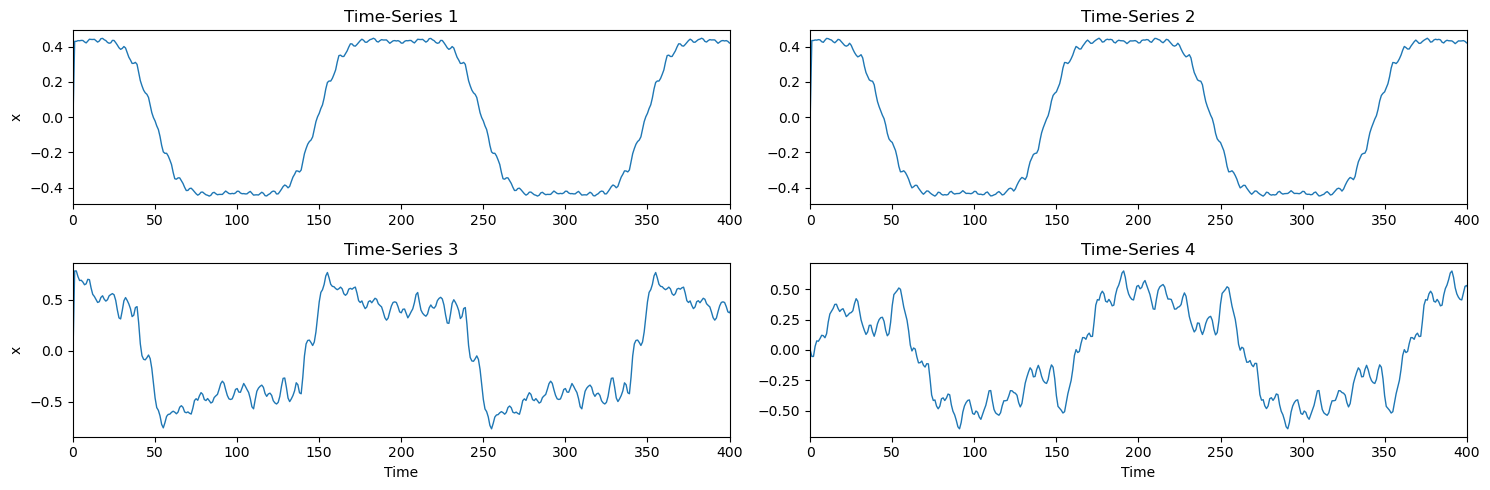

In [375]:
fig, axes = plt.subplots(2,2, figsize=(15,5))
for index, ax in enumerate(axes.ravel()):
    ax.plot(Donnees_list[index], lw=1)
    ax.set_title(f'Time-Series {index+1}')
    if index == 2 or index == 3:
        ax.set_xlabel('Time')
    if index == 0 or index == 2:
        ax.set_ylabel('x')
    ax.set_xlim(0, 400)
fig.tight_layout()

# Construct a pandas dataframe using the extracted features. We will use the feature names to label the columns.

In [376]:

features = np.array([catch22.catch22_all(Donnees_list[i])['values'] for i in range(len(Donnees_list))])
df = pd.DataFrame(features, columns=fnames22)

Check the catch22 time-series x feature matrix shape.

In [377]:
df.shape


(4, 22)

In [378]:
df.head()

,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,...,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr
0,-6.986158e-07,-6.986158e-07,34.093415,99.0,1.025196,0.001896,0.29125,101.0,0.001302,200.0,...,0.500000,0.002497,0.000000,0.996239,19.0,1.207450,0.765957,0.702128,0.03068,0.084821
1,-7.980754e-05,-7.980754e-05,34.146728,99.0,1.039569,0.001961,0.27625,101.0,0.009115,200.0,...,0.489796,0.002497,-0.013733,0.996200,25.0,1.207450,0.659574,0.638298,0.03068,0.084953
2,1.321187e+00,-8.205072e-01,27.977312,100.0,0.926318,0.005753,0.68250,101.0,0.008074,199.0,...,0.065217,-0.008739,-0.013733,0.986890,10.0,1.520665,0.744681,0.702128,0.03068,0.199558
3,-1.346877e+00,-1.175834e+00,31.255313,100.0,0.824055,0.000048,0.78625,101.0,0.009115,199.0,...,0.061224,0.017478,0.039950,0.988795,9.0,1.338638,0.808511,0.702128,0.03068,0.221565
